In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
#from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from PIL import Image
import random
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.decomposition import PCA

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
image_set= '/content/drive/MyDrive/BraintumorData'

In [32]:
for i,d in enumerate([image_set]):
    filepaths=[]
    labels=[]
    classlist=os.listdir(d)
    for klass in classlist:
        classpath=os.path.join(d,klass)
        if os.path.isdir(classpath):
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)
    Fseries= pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    brain_df=pd.concat([Fseries, Lseries], axis=1)
df=pd.concat([brain_df], axis =0).reset_index(drop=True)# make a combined dataframe

print(df['labels'].value_counts())

BrainTumor    2513
Healthy       2087
Name: labels, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_split=.6
test_split=.2
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), ' _test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  2760  _test_df length:  920   valid_df length:  920


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
height=224
width=224
channels=3
batch_size=32
img_shape=(height, width, channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):
    return img/127.5-1  # scale pixel between -1 and +1
gen=ImageDataGenerator(preprocessing_function=scalar)
train_set=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_set=gen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
validate_set=gen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
#classes=list(train_gen.class_indices.keys())
#class_count=len(classes)

test batch size:  46   test steps:  20
Found 2760 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


In [36]:
IMAGE_SIZE = [224, 224]

In [37]:
# importing libraries

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from  tensorflow import keras

In [38]:
MobileNet = tf.keras.applications.MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [39]:
#vgg=tf.keras.applications.VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
# # don't train existing weights
for layer in MobileNet.layers:
     layer.trainable = False

In [41]:
flatten = Flatten()(MobileNet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(2, activation = 'softmax')(dense)

In [42]:
#creating a model
model_1 = Model(inputs = MobileNet.input, outputs = prediction )

In [43]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [44]:
# COMPILING THE MODEL

model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [45]:
#executing the model
history = model_1.fit(train_set, validation_data = (validate_set), epochs = 50, verbose = 1)


Epoch 1/50
87/87 [==============================] - 23s 229ms/step - loss: 1.1710 - accuracy: 0.8931 - val_loss: 0.2865 - val_accuracy: 0.9359
Epoch 2/50
87/87 [==============================] - 19s 218ms/step - loss: 0.1494 - accuracy: 0.9674 - val_loss: 0.1551 - val_accuracy: 0.9696
Epoch 3/50
87/87 [==============================] - 19s 214ms/step - loss: 0.0266 - accuracy: 0.9946 - val_loss: 0.2302 - val_accuracy: 0.9783
Epoch 4/50
87/87 [==============================] - 19s 219ms/step - loss: 0.0232 - accuracy: 0.9960 - val_loss: 0.2923 - val_accuracy: 0.9761
Epoch 5/50
87/87 [==============================] - 18s 212ms/step - loss: 0.0286 - accuracy: 0.9957 - val_loss: 0.1861 - val_accuracy: 0.9783
Epoch 6/50
87/87 [==============================] - 20s 232ms/step - loss: 1.0159e-04 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9826
Epoch 7/50
87/87 [==============================] - 19s 213ms/step - loss: 8.3256e-06 - accuracy: 1.0000 - val_loss: 0.1835 - val_accuracy

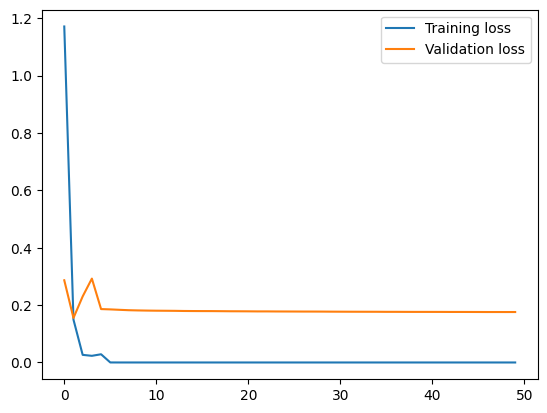

In [46]:
# plotting the loss
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
#plt.title('loss')
plt.legend()
plt.show()

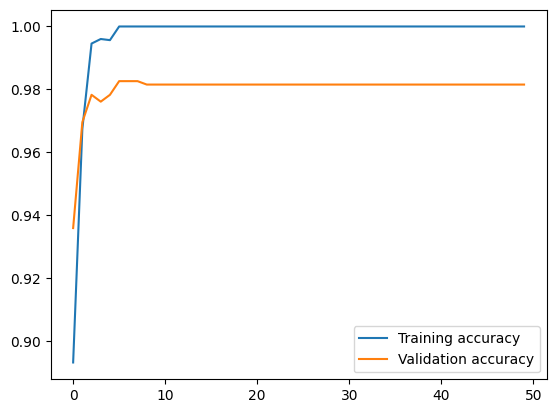

In [47]:
# Both Validation and Training accuracy is shown here

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
#plt.title('Accuracy')
plt.legend()
plt.show()

In [48]:
# CHECKING THE CONFUSION MATRIX

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model_1.predict(test_set)
y_pred = np.argmax(Y_pred ,axis =1)


20/20 [==============================] - 4s 203ms/step


In [49]:
preds = model_1.predict(test_set,verbose=1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

20/20 [==============================] - 5s 236ms/step


<Axes: >

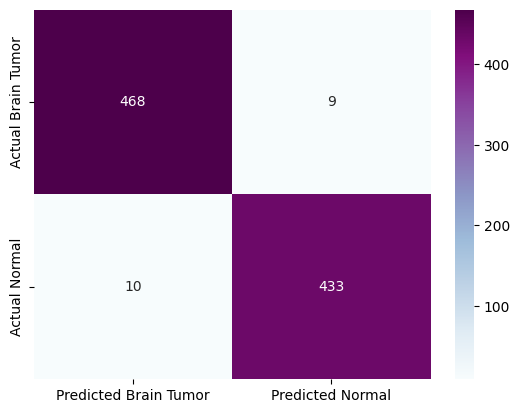

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix( y_true= test_set.classes, y_pred= y_pred, labels=[0, 1]), index=['Actual Brain Tumor','Actual Normal'],columns=['Predicted Brain Tumor','Predicted Normal'])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d",cmap="BuPu")

In [51]:
print('Classification Report')
target_names = ['Brain Tumor','Normal']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

 Brain Tumor       0.98      0.98      0.98       477
      Normal       0.98      0.98      0.98       443

    accuracy                           0.98       920
   macro avg       0.98      0.98      0.98       920
weighted avg       0.98      0.98      0.98       920



In [52]:
loss, acc = model_1.evaluate_generator(test_set, len(test_set))

print ("\n\n================================\n\n")
print ("Loss: {}".format(loss))
print ("Accuracy: {0:.2f} %".format(acc * 100))
print ("\n\n================================\n\n")

test_set.reset()

<ipython-input-52-0bfbb599d6c5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model_1.evaluate_generator(test_set, len(test_set))






Loss: 0.24333719909191132
Accuracy: 97.93 %






In [53]:
result = model_1.evaluate(test_set,batch_size=128)
print("test_loss, test accuracy",result)

20/20 [==============================] - 4s 215ms/step - loss: 0.2433 - accuracy: 0.9793
test_loss, test accuracy [0.24333719909191132, 0.979347825050354]


In [54]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Y_pred = model.predict_generator(validation_generator, nb_validation_samples //
#batch_size+1)
y_pred = np.argmax(preds, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Confusion Matrix
[[468   9]
 [ 10 433]]
